# Import Libraries

In [514]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

print(tf.__version__)

2.9.1


# Import Dataset from csv file

In [515]:
df = pd.read_csv(r'Dataset\dataset-song-genre.csv')
print(df)

                     track_id                       artists  \
0      3txHZTpGeVASXa5ARwoRX6                        Frejat   
1      2e7LBdeiidf0ZC5Qj52u0G                         STU48   
2      0hlh787aY52rcNvJHnE0Ml             Mike NRG;Weapon X   
3      3s067jTdOv8wnuUHeXdtjT        NICO Touches the Walls   
4      4oE62AqzUuiwV09HGxiMlu       Edvard Grieg;Una Bourne   
...                       ...                           ...   
91195  0Y1hw2GXV8npQI7C21ZIT1                      Surfaces   
91196  43QSsuxazI8xms29SYCtxh                 KANA-BOON;もっさ   
91197  7nbj09isjVmgNYJ7eKBzyt                    Zach Bryan   
91198  5bVUUTXB0Dg7EzuSZC57ek  Joey Montana;Sebastian Yatra   
91199  2RjWCcfCOMzKeRJzeoe4h6            Noisia;The Upbeats   

                                album_name  \
0            Frejat Ao Vivo No Rock In Rio   
1                       無謀な夢は覚めることがない【劇場盤】   
2         Lost in Dreams (Q-Base OST 2008)   
3                                     オーロラ   
4      Mozart

In [516]:
df.shape

(91200, 20)

# Estamos verificando datos con fallas y eliminandolos del dataframe

In [517]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [518]:
df = df.dropna()

In [519]:
df.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

# volvemos datos booleanos a numéricos

In [520]:
df = df.astype({'explicit':'int'})

In [521]:
df['explicit']

0        0
1        0
2        0
3        0
4        0
        ..
91195    0
91196    0
91197    0
91198    0
91199    0
Name: explicit, Length: 91199, dtype: int32

In [522]:
# dividing dataset to data to train and data to test
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [523]:
train_dataset.shape


(72959, 20)

In [524]:
test_dataset.shape

(18240, 20)

In [525]:
#know the column labels from dataset
train_dataset.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [526]:
#sns.pairplot(train_dataset[['popularity',
#       'duration_ms', 'explicit', 'danceability', 'energy', 'loudness', 'key',
#       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
#       'valence', 'tempo', 'time_signature', 'track_genre']], diag_kind="kde")

In [527]:
train_dataset = train_dataset.drop(['track_id','artists','album_name','track_name','duration_ms', 'key','liveness'],axis=1)

In [528]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
popularity,72959.0,33.331529,22.294772,0.000,17.0000,35.00000,50.0000,100.000
explicit,72959.0,0.086501,0.281104,0.000,0.0000,0.00000,0.0000,1.000
danceability,72959.0,0.567351,0.173699,0.000,0.4560,0.58100,0.6960,0.985
energy,72959.0,0.641243,0.251494,0.000,0.4730,0.68400,0.8530,1.000
loudness,72959.0,-8.266214,5.055703,-49.531,-10.0200,-7.00000,-4.9995,3.156
mode,72959.0,0.637564,0.480707,0.000,0.0000,1.00000,1.0000,1.000
speechiness,72959.0,0.084279,0.104907,0.000,0.0359,0.04890,0.0842,0.965
acousticness,72959.0,0.314746,0.332257,0.000,0.0170,0.16900,0.5970,0.996
instrumentalness,72959.0,0.155217,0.309202,0.000,0.0000,0.00004,0.0461,1.000
valence,72959.0,0.474543,0.259265,0.000,0.2600,0.46400,0.6830,0.995


In [529]:
train_dataset.transpose()

,5413,64083,62381,24917,73671,85455,83795,68260,52875,55544,...,75202,9057,86998,39291,60543,9457,58285,89873,62841,75130
popularity,0,18,54,44,23,10,10,78,43,0,...,0,56,1,53,66,1,21,76,0,0
explicit,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
danceability,0.754,0.435,0.776,0.846,0.546,0.423,0.405,0.727,0.224,0.798,...,0.714,0.703,0.485,0.849,0.623,0.159,0.599,0.609,0.682,0.874
energy,0.763,0.712,0.814,0.747,0.969,0.206,0.469,0.681,0.499,0.625,...,0.671,0.498,0.924,0.378,0.796,0.181,0.583,0.449,0.919,0.69
loudness,-4.627,-8.452,-5.86,-5.998,-5.05,-23.209,-12.32,-7.114,-7.4,-6.83,...,-5.119,-6.688,-4.046,-11.972,-2.981,-18.412,-6.96,-13.291,-3.18,-6.373
mode,0,1,0,0,0,0,1,0,0,1,...,1,0,1,0,0,1,1,0,0,1
speechiness,0.0435,0.153,0.0737,0.0694,0.0512,0.0345,0.0437,0.0265,0.0379,0.13,...,0.362,0.0805,0.0579,0.0455,0.199,0.0566,0.0273,0.249,0.0874,0.114
acousticness,0.0301,0.000163,0.0336,0.0694,0.00196,0.936,0.452,0.00214,0.0379,0.383,...,0.292,0.0639,0.0373,0.324,0.659,0.979,0.624,0.326,0.256,0.121
instrumentalness,0.000022,0.916,0.0,0.0,0.000051,0.947,0.0,0.000307,0.000007,0.000033,...,0.0,0.0284,0.000002,0.583,0.0,0.912,0.000078,0.000115,0.0,0.0
valence,0.464,0.289,0.831,0.79,0.46,0.0369,0.921,0.448,0.125,0.774,...,0.641,0.364,0.661,0.229,0.607,0.0334,0.365,0.309,0.535,0.735


In [530]:
train_labels = train_dataset.pop('track_genre')

In [531]:
label_dict = dict(enumerate(set(train_labels)))

In [532]:
label_dict = {v: k for k, v in label_dict.items()}

In [533]:
label_dict

{'breakbeat': 0,
 'salsa': 1,
 'samba': 2,
 'rockabilly': 3,
 'sad': 4,
 'detroit-techno': 5,
 'tango': 6,
 'heavy-metal': 7,
 'r-n-b': 8,
 'reggaeton': 9,
 'indian': 10,
 'study': 11,
 'pop': 12,
 'romance': 13,
 'french': 14,
 'grindcore': 15,
 'drum-and-bass': 16,
 'gospel': 17,
 'sertanejo': 18,
 'dance': 19,
 'malay': 20,
 'dub': 21,
 'alternative': 22,
 'songwriter': 23,
 'hip-hop': 24,
 'ambient': 25,
 'country': 26,
 'guitar': 27,
 'opera': 28,
 'mandopop': 29,
 'honky-tonk': 30,
 'garage': 31,
 'hard-rock': 32,
 'dancehall': 33,
 'disco': 34,
 'jazz': 35,
 'world-music': 36,
 'j-pop': 37,
 'club': 38,
 'swedish': 39,
 'trance': 40,
 'happy': 41,
 'idm': 42,
 'pagode': 43,
 'chill': 44,
 'electro': 45,
 'techno': 46,
 'disney': 47,
 'grunge': 48,
 'alt-rock': 49,
 'german': 50,
 'iranian': 51,
 'rock': 52,
 'show-tunes': 53,
 'reggae': 54,
 'forro': 55,
 'psych-rock': 56,
 'k-pop': 57,
 'bluegrass': 58,
 'turkish': 59,
 'deep-house': 60,
 'sleep': 61,
 'classical': 62,
 'rock-n

In [534]:
label_dict['salsa']

1

In [535]:
len(label_dict)

114

In [536]:
train_labels_num = []
for label in train_labels:
    train_labels_num.append(label_dict[label])

train_labels_num

[19,
 15,
 60,
 10,
 77,
 42,
 30,
 69,
 21,
 54,
 7,
 107,
 33,
 14,
 29,
 58,
 93,
 15,
 98,
 63,
 108,
 35,
 13,
 24,
 42,
 49,
 106,
 20,
 82,
 69,
 97,
 19,
 93,
 91,
 37,
 66,
 78,
 112,
 48,
 100,
 18,
 7,
 42,
 40,
 42,
 72,
 85,
 111,
 65,
 108,
 38,
 38,
 0,
 2,
 36,
 33,
 74,
 86,
 69,
 67,
 104,
 105,
 77,
 65,
 66,
 25,
 10,
 104,
 40,
 84,
 54,
 55,
 23,
 10,
 4,
 45,
 5,
 108,
 53,
 81,
 107,
 104,
 87,
 67,
 47,
 19,
 6,
 34,
 57,
 101,
 6,
 6,
 26,
 15,
 87,
 103,
 73,
 96,
 112,
 100,
 26,
 40,
 20,
 77,
 15,
 97,
 110,
 76,
 42,
 42,
 88,
 112,
 69,
 105,
 7,
 74,
 95,
 52,
 57,
 108,
 41,
 90,
 35,
 41,
 105,
 54,
 78,
 67,
 30,
 97,
 94,
 67,
 14,
 55,
 0,
 25,
 113,
 33,
 95,
 25,
 106,
 57,
 14,
 94,
 105,
 77,
 4,
 57,
 88,
 25,
 47,
 22,
 17,
 5,
 93,
 10,
 73,
 83,
 3,
 88,
 86,
 4,
 102,
 107,
 79,
 94,
 107,
 63,
 112,
 86,
 44,
 78,
 48,
 1,
 97,
 39,
 0,
 84,
 35,
 14,
 82,
 8,
 83,
 40,
 20,
 56,
 67,
 59,
 77,
 34,
 30,
 29,
 46,
 27,
 99,
 74,
 91,
 18,

In [537]:
train_labels

5413          dance
64083     grindcore
62381    deep-house
24917        indian
73671    industrial
            ...    
9457        iranian
58285    show-tunes
89873     indie-pop
62841       hip-hop
75130     reggaeton
Name: track_genre, Length: 72959, dtype: object

# Normalizando los datos


In [538]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,72959.0,1.967690e-16,1.0,-1.495038,-0.732527,0.074837,0.747640,2.990319
explicit,72959.0,-5.074988e-16,1.0,-0.307718,-0.307718,-0.307718,-0.307718,3.249687
danceability,72959.0,5.179309e-14,1.0,-3.266287,-0.641055,0.078581,0.740646,2.404445
energy,72959.0,-8.411438e-15,1.0,-2.549740,-0.668977,0.170011,0.841996,1.426504
loudness,72959.0,2.202361e-14,1.0,-8.162027,-0.346893,0.250453,0.646144,2.259273
mode,72959.0,-3.361163e-15,1.0,-1.326303,-1.326303,0.753965,0.753965,0.753965
speechiness,72959.0,2.089112e-14,1.0,-0.803361,-0.461155,-0.337236,-0.000749,8.395221
acousticness,72959.0,8.131865e-15,1.0,-0.947298,-0.896133,-0.438656,0.849504,2.050381
instrumentalness,72959.0,9.368210e-15,1.0,-0.501991,-0.501991,-0.501861,-0.352897,2.732141
valence,72959.0,-2.344053e-14,1.0,-1.830338,-0.827504,-0.040665,0.804030,2.007430


# Construyendo el modelo

In [539]:
len(normed_train_data.keys())


12

In [540]:
normed_train_data.shape

(72959, 12)

In [541]:
def build_model():
    model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[len(normed_train_data.keys())]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(label_dict), activation='softmax')
    ])

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

    return model

# Train Model

In [542]:
model = build_model()

In [543]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                832       
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 114)               7410      
                                                                 
Total params: 12,402
Trainable params: 12,402
Non-trainable params: 0
_________________________________________________________________


In [544]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)

1/1 [==============================] - 0s 31ms/step


In [545]:
np.argmax(example_result[0])

18

In [546]:
train_labels_num[:10]

[19, 15, 60, 10, 77, 42, 30, 69, 21, 54]

In [547]:
train_labels_num = np.array(train_labels_num)

In [548]:
train_labels_num

array([19, 15, 60, ..., 93, 24,  9])

In [550]:

hist = model.fit(normed_train_data, train_labels_num, validation_split = 0.2, epochs=10)


Epoch 1/10
1824/1824 [==============================] - 2s 1ms/step - loss: 2.7280 - accuracy: 0.2887 - val_loss: 2.8084 - val_accuracy: 0.2771
Epoch 2/10
1824/1824 [==============================] - 2s 1ms/step - loss: 2.7138 - accuracy: 0.2904 - val_loss: 2.7928 - val_accuracy: 0.2778
Epoch 3/10
1824/1824 [==============================] - 2s 1ms/step - loss: 2.7000 - accuracy: 0.2924 - val_loss: 2.7857 - val_accuracy: 0.2771
Epoch 4/10
1824/1824 [==============================] - 2s 1ms/step - loss: 2.6886 - accuracy: 0.2949 - val_loss: 2.7838 - val_accuracy: 0.2784
Epoch 5/10
1824/1824 [==============================] - 2s 1ms/step - loss: 2.6781 - accuracy: 0.2949 - val_loss: 2.7795 - val_accuracy: 0.2805
Epoch 6/10
1824/1824 [==============================] - 2s 1ms/step - loss: 2.6677 - accuracy: 0.2984 - val_loss: 2.7676 - val_accuracy: 0.2821
Epoch 7/10
1824/1824 [==============================] - 2s 1ms/step - loss: 2.6573 - accuracy: 0.3008 - val_loss: 2.7585 - val_accuracy:

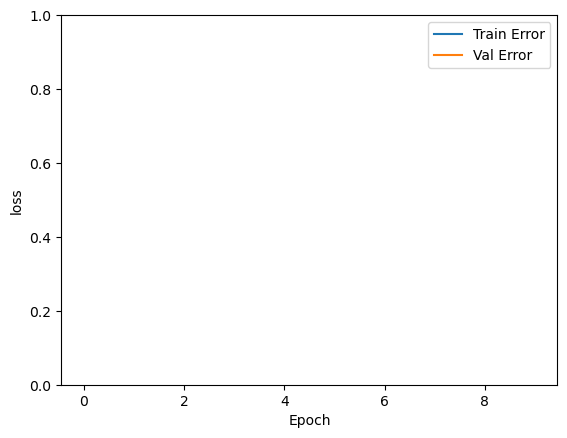

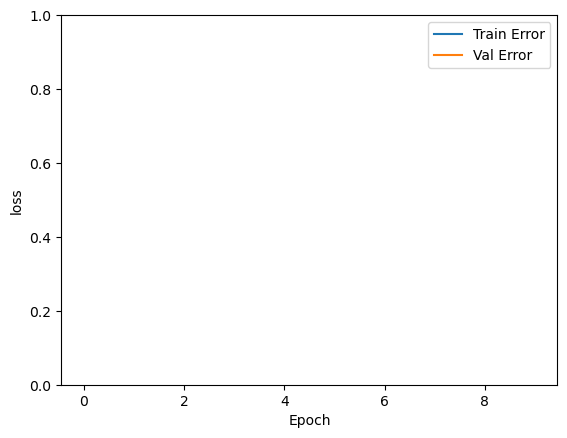

In [552]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()
    plt.show()

plot_history(hist)